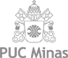
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 03_02_Modelos_DBSCAN.ipynb

<B>Data:</B> 18/03/2022
    
<a class="anchor" id="etapas"></a>

## Indice

1. [Redução Dimensões](#reduzdimi)<br>
&emsp;1.1 [PCA](#pca)<br>
&emsp;1.2 [t-SNE](#tsne)<br>
&emsp;1.3 [UMAP](#uma)<br>
2. [Sem Redução](#semr)<br>
3. [Análise do dataframe df_score](#analise)<br>


<p><b>Localização Projeto: </b> <a href = 'https://github.com/Alexandre-316/Projeto_Ciencia_de_Dados' target = "_blank">Git Hub</a></p>

In [1]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%whos

Interactive namespace is empty.


In [3]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


import seaborn as sns
#import datetime

from datetime import datetime

from scipy import stats
from scipy.stats    import normaltest, kstest
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples,silhouette_score, davies_bouldin_score, calinski_harabasz_score

import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

## <a class="anchor" id="reduzdimi">1. Reduções de Dimensões</a>
[Retorna ao Indice](#etapas)

In [4]:
df_minmax_PCA_9_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_PCA_9_features.xlsx',index_col=0)
df_robust_PCA_9_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_PCA_9_features.xlsx',index_col=0)
df_power_PCA_15_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_PCA_15_features.xlsx',index_col=0)


In [5]:
#df_abt = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
df_minmax_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_TSNE_2_features.xlsx',index_col=0)
df_robust_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_TSNE_2_features.xlsx',index_col=0)
df_power_TSNE_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_TSNE_2_features.xlsx',index_col=0)

In [6]:
df_minmax_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_SemReducao_17_features.xlsx',index_col=0)
df_robust_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_SemReducao_17_features.xlsx',index_col=0)
df_power_SemReducao_17_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_SemReducao_17_features.xlsx',index_col=0)

In [7]:
df_minmax_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_UMAP_2_features.xlsx',index_col=0)
df_robust_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_UMAP_2_features.xlsx',index_col=0)
df_power_UMAP_2_features = pd.read_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_UMAP_2_features.xlsx',index_col=0)

In [8]:
df_abt = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
#sem correlação
df_abt_sc=pd.read_excel(caminho_temp+'02_Coleta_Processamento_df_abt_sem_correlacao.xlsx')

In [9]:
df_abt_= df_abt_sc.select_dtypes(include=["int64", "float64"])
df_score= pd.DataFrame(columns= ['Algor.','Transf.', 'Red.Dim.','Features','eps','clusters','silhouette', 'davies', 'calinski'])


In [10]:
df_abt.shape,df_abt_.shape

((1658, 114), (1658, 17))

## <a class="anchor" id="pca">1.1. PCA</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,MinMaxScaler,PCA,9,0.1,68,-0.410455,1.346166,6.836147
1,DBSCAN,MinMaxScaler,PCA,9,0.2,28,-0.162693,1.377486,10.500785
2,DBSCAN,MinMaxScaler,PCA,9,0.3,11,0.127408,1.501383,18.693404
3,DBSCAN,MinMaxScaler,PCA,9,0.4,3,0.463064,1.676943,36.022674
4,DBSCAN,MinMaxScaler,PCA,9,0.5,2,0.487598,1.852469,21.575523
5,DBSCAN,MinMaxScaler,PCA,9,0.6,2,0.540817,0.987099,21.240516
6,DBSCAN,MinMaxScaler,PCA,9,0.7,2,0.588676,0.803106,14.802718
7,DBSCAN,MinMaxScaler,PCA,9,0.8,2,0.588676,0.803106,14.802718
8,DBSCAN,MinMaxScaler,PCA,9,0.9,2,0.583088,0.309393,8.705534


Wall time: 2.41 s


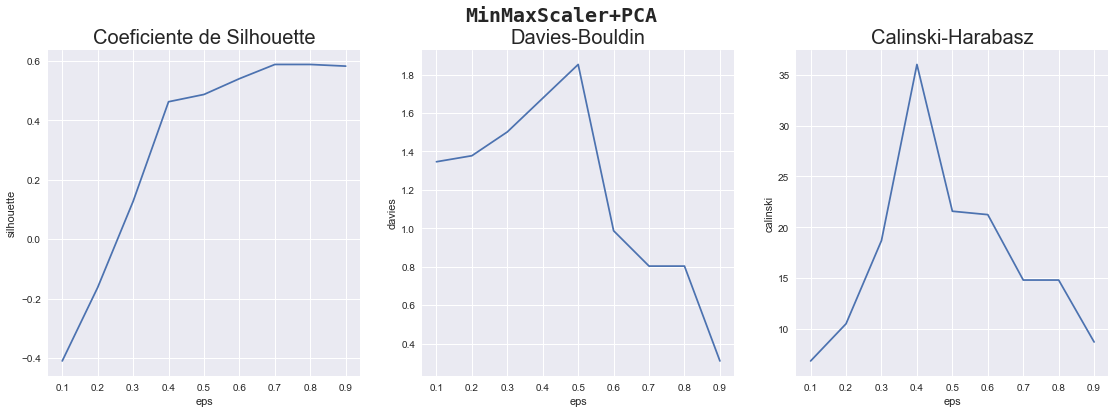

In [12]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_minmax_PCA_9_features, 1,10, (19,6),'MinMaxScaler+PCA','DBSCAN','MinMaxScaler','PCA')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,RobustScaler,PCA,9,0.1,6,-0.544107,1.954071,0.159001
1,DBSCAN,RobustScaler,PCA,9,0.2,33,-0.544267,1.935880,0.208287
2,DBSCAN,RobustScaler,PCA,9,0.3,57,-0.513279,1.979858,0.244807
3,DBSCAN,RobustScaler,PCA,9,0.4,63,-0.486951,1.961478,0.494062
4,DBSCAN,RobustScaler,PCA,9,0.5,50,-0.484116,1.909703,0.926889
5,DBSCAN,RobustScaler,PCA,9,0.6,52,-0.430223,1.875003,1.175692
6,DBSCAN,RobustScaler,PCA,9,0.7,52,-0.379443,1.792241,1.561368
7,DBSCAN,RobustScaler,PCA,9,0.8,58,-0.349312,1.763357,1.733546
8,DBSCAN,RobustScaler,PCA,9,0.9,58,-0.349047,1.792535,2.018933


Wall time: 2.01 s


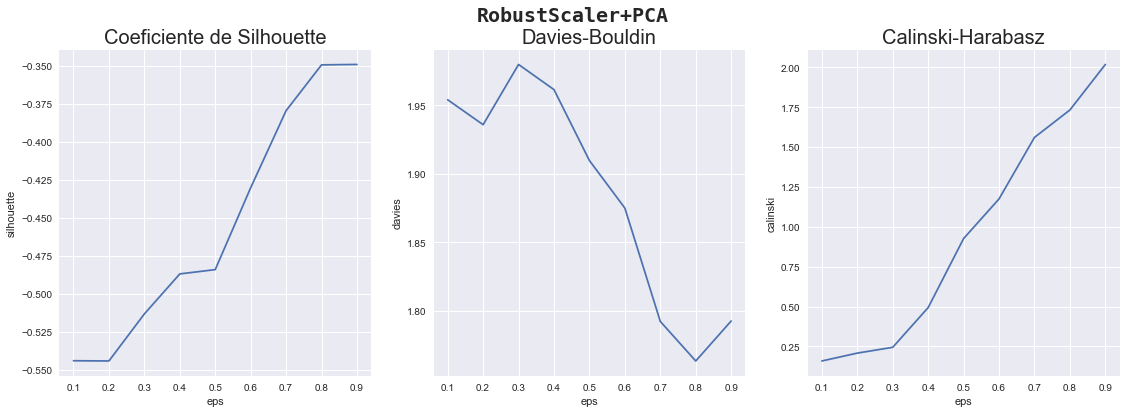

In [13]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_robust_PCA_9_features, 1,10, (19,6),'RobustScaler+PCA','DBSCAN','RobustScaler','PCA')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,PowerTransformer,PCA,15,3.0,14,0.062436,1.867410,20.117109
1,DBSCAN,PowerTransformer,PCA,15,3.1,11,0.100091,1.973696,25.856130
2,DBSCAN,PowerTransformer,PCA,15,3.2,10,0.169920,2.082092,28.712019
3,DBSCAN,PowerTransformer,PCA,15,3.3,9,0.179272,2.191303,32.548220
4,DBSCAN,PowerTransformer,PCA,15,3.4,7,0.196766,2.423076,42.324674
5,DBSCAN,PowerTransformer,PCA,15,3.5,7,0.200073,2.465033,43.071341
6,DBSCAN,PowerTransformer,PCA,15,3.6,6,0.212368,2.588201,51.707594
7,DBSCAN,PowerTransformer,PCA,15,3.7,6,0.213930,2.593936,52.397479
8,DBSCAN,PowerTransformer,PCA,15,3.8,5,0.255515,2.759622,65.073025
9,DBSCAN,PowerTransformer,PCA,15,3.9,5,0.255590,2.769704,65.152613


Wall time: 7.88 s


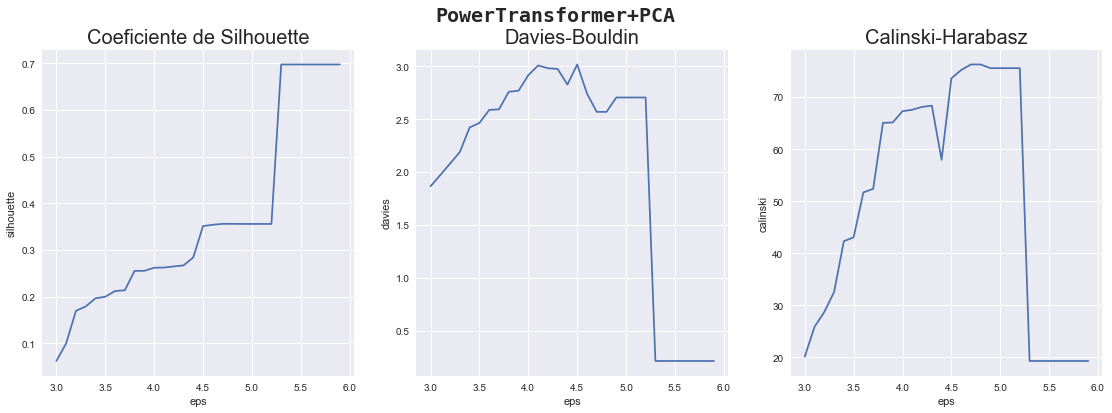

In [14]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_power_PCA_15_features, 30,60, (19,6),'PowerTransformer+PCA','DBSCAN','PowerTransformer','PCA')


## <a class="anchor" id="tsne">1.2. t-SNE</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,MinMaxScaler,t-SNE,2,0.1,27,-0.745787,1.145857,2.428116
1,DBSCAN,MinMaxScaler,t-SNE,2,0.2,78,-0.719687,1.291203,2.212225
2,DBSCAN,MinMaxScaler,t-SNE,2,0.3,154,-0.579355,1.296862,2.510036
3,DBSCAN,MinMaxScaler,t-SNE,2,0.4,243,-0.394858,1.346441,2.806885
4,DBSCAN,MinMaxScaler,t-SNE,2,0.5,324,-0.190870,1.362422,3.487298
5,DBSCAN,MinMaxScaler,t-SNE,2,0.6,362,-0.024704,1.379802,4.977312
6,DBSCAN,MinMaxScaler,t-SNE,2,0.7,388,0.121036,1.404196,8.134841
7,DBSCAN,MinMaxScaler,t-SNE,2,0.8,347,0.189660,1.479322,15.222728
8,DBSCAN,MinMaxScaler,t-SNE,2,0.9,293,0.220903,1.481021,30.769997


Wall time: 2.89 s


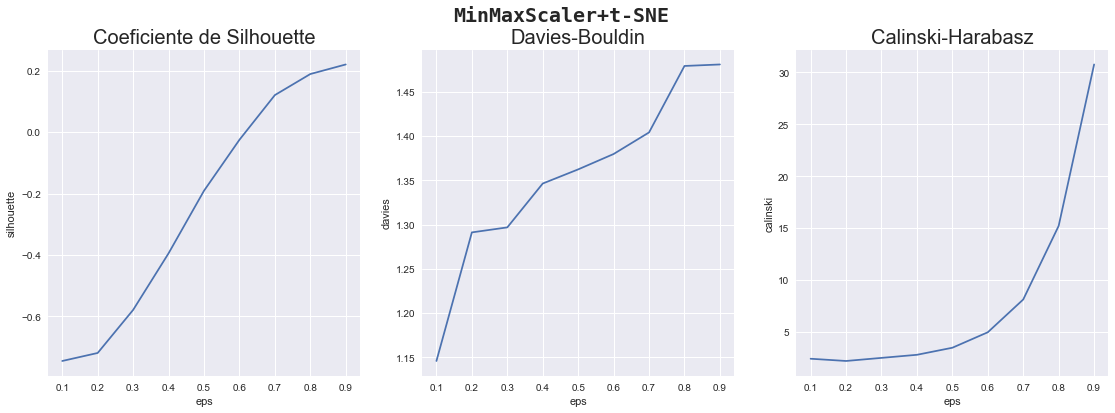

In [15]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_minmax_TSNE_2_features, 1,10, (19,6),'MinMaxScaler+t-SNE','DBSCAN','MinMaxScaler','t-SNE')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,RobustScaler,t-SNE,2,0.1,30,-0.710535,0.932826,2.632747
1,DBSCAN,RobustScaler,t-SNE,2,0.2,78,-0.716857,1.328626,2.464018
2,DBSCAN,RobustScaler,t-SNE,2,0.3,160,-0.565922,1.569690,2.512895
3,DBSCAN,RobustScaler,t-SNE,2,0.4,242,-0.400381,1.596397,2.804368
4,DBSCAN,RobustScaler,t-SNE,2,0.5,326,-0.210990,1.645620,3.466173
5,DBSCAN,RobustScaler,t-SNE,2,0.6,367,-0.052217,1.602790,4.956810
6,DBSCAN,RobustScaler,t-SNE,2,0.7,397,0.080829,1.520288,7.317095
7,DBSCAN,RobustScaler,t-SNE,2,0.8,392,0.164986,1.638983,11.218644
8,DBSCAN,RobustScaler,t-SNE,2,0.9,366,0.222210,1.583432,19.763682


Wall time: 2.95 s


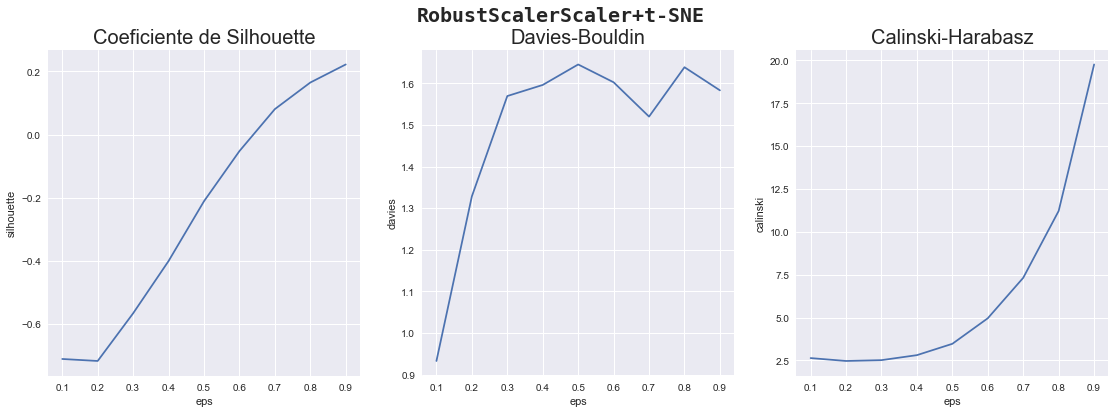

In [16]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_robust_TSNE_2_features, 1,10, (19,6),'RobustScalerScaler+t-SNE','DBSCAN','RobustScaler','t-SNE')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,PowerTransformer,t-SNE,2,3.0,14,-0.159398,0.718336,296.919159
1,DBSCAN,PowerTransformer,t-SNE,2,3.1,13,-0.216615,0.716187,274.734325
2,DBSCAN,PowerTransformer,t-SNE,2,3.2,11,-0.126392,0.690132,329.079961
3,DBSCAN,PowerTransformer,t-SNE,2,3.3,11,-0.126392,0.690132,329.079961
4,DBSCAN,PowerTransformer,t-SNE,2,3.4,10,-0.027795,0.672153,363.763777
5,DBSCAN,PowerTransformer,t-SNE,2,3.5,10,-0.027795,0.672153,363.763777
6,DBSCAN,PowerTransformer,t-SNE,2,3.6,10,-0.027795,0.672153,363.763777
7,DBSCAN,PowerTransformer,t-SNE,2,3.7,10,-0.027795,0.672153,363.763777
8,DBSCAN,PowerTransformer,t-SNE,2,3.8,10,-0.027795,0.672153,363.763777
9,DBSCAN,PowerTransformer,t-SNE,2,3.9,7,-0.052914,0.604935,344.350658


Wall time: 4.93 s


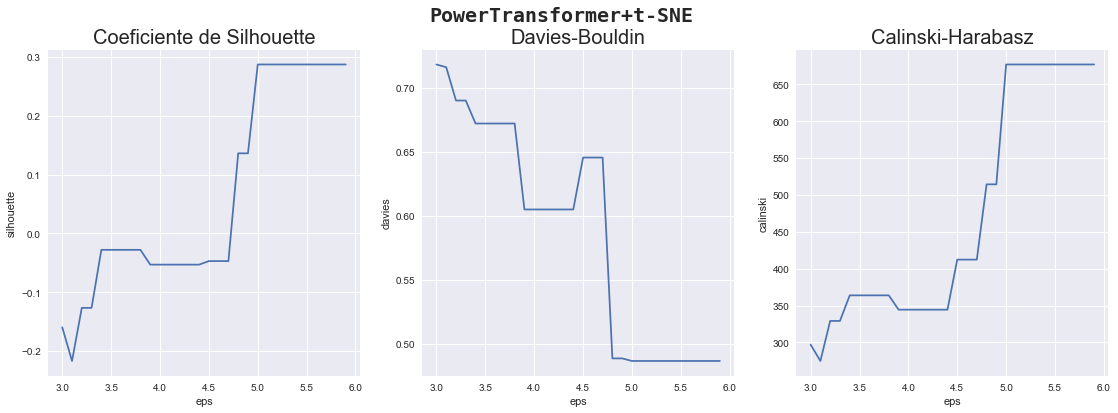

In [17]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_power_TSNE_2_features, 30,60, (19,6),'PowerTransformer+t-SNE','DBSCAN','PowerTransformer','t-SNE')


## <a class="anchor" id="uma">1.3. UMAP</a>

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,MinMaxScaler,UMAP,2,0.1,232,0.150018,1.357212,43.122308
1,DBSCAN,MinMaxScaler,UMAP,2,0.2,50,-0.047499,1.984567,454.490763
2,DBSCAN,MinMaxScaler,UMAP,2,0.3,12,-0.198604,1.762766,246.895768
3,DBSCAN,MinMaxScaler,UMAP,2,0.4,5,-0.275203,1.145819,6.311490
4,DBSCAN,MinMaxScaler,UMAP,2,0.5,2,-0.068709,1.035907,2.539361


Wall time: 1.11 s


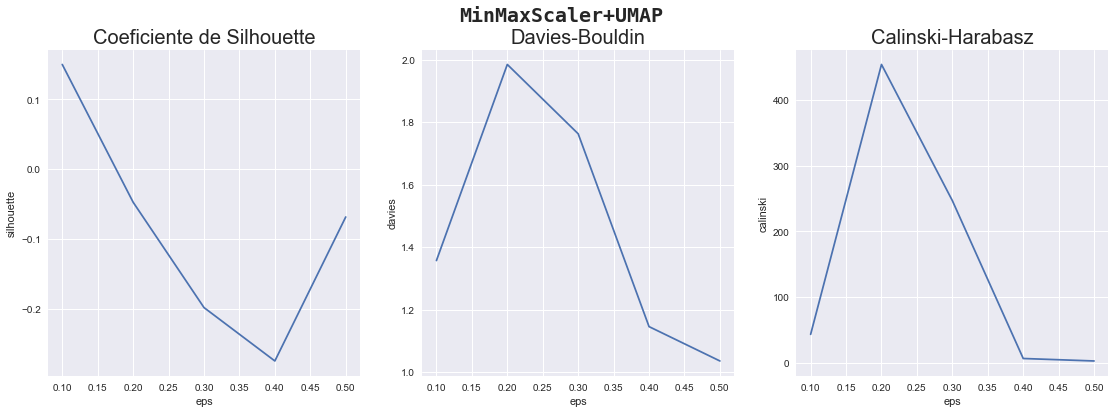

In [18]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_minmax_UMAP_2_features, 1,6, (19,6),'MinMaxScaler+UMAP','DBSCAN','MinMaxScaler','UMAP')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,RobustScaler,UMAP,2,0.1,242,0.175960,1.601438,31.685985
1,DBSCAN,RobustScaler,UMAP,2,0.2,28,-0.362622,1.762364,58.817145
2,DBSCAN,RobustScaler,UMAP,2,0.3,7,-0.195853,2.481509,63.190509
3,DBSCAN,RobustScaler,UMAP,2,0.4,3,-0.147913,1.245306,60.220496
4,DBSCAN,RobustScaler,UMAP,2,0.5,2,0.188308,0.710734,120.112841


Wall time: 1.17 s


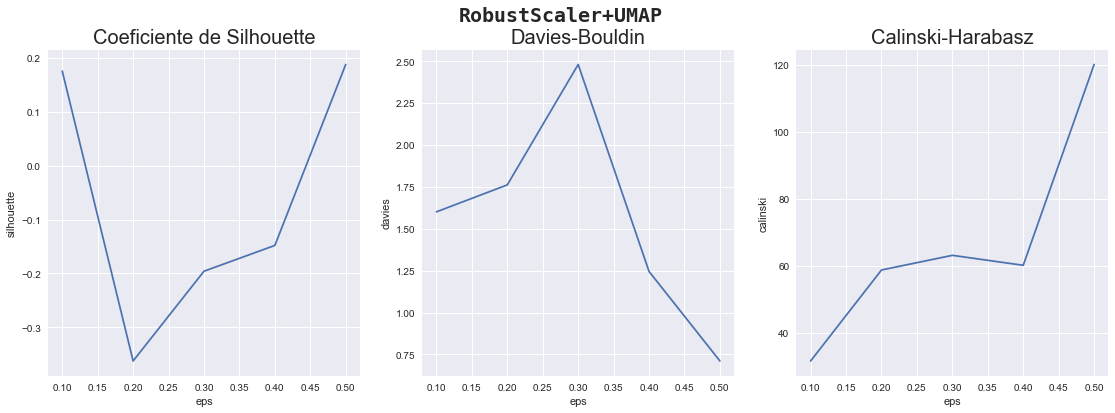

In [19]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_robust_UMAP_2_features, 1,6, (19,6),'RobustScaler+UMAP','DBSCAN','RobustScaler','UMAP')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,PowerTransformer,UMAP,2,0.1,183,0.266859,1.628030,131.924639
1,DBSCAN,PowerTransformer,UMAP,2,0.2,19,0.123229,1.110850,848.744620
2,DBSCAN,PowerTransformer,UMAP,2,0.3,12,0.190167,0.862681,1195.180280
3,DBSCAN,PowerTransformer,UMAP,2,0.4,6,0.432606,0.454361,1097.023785
4,DBSCAN,PowerTransformer,UMAP,2,0.5,5,0.564463,0.330763,794.557145
5,DBSCAN,PowerTransformer,UMAP,2,0.6,5,0.564463,0.330763,794.557145
6,DBSCAN,PowerTransformer,UMAP,2,0.7,5,0.564463,0.330763,794.557145
7,DBSCAN,PowerTransformer,UMAP,2,0.8,5,0.564463,0.330763,794.557145
8,DBSCAN,PowerTransformer,UMAP,2,0.9,4,0.562149,0.365936,1056.659171


Wall time: 1.66 s


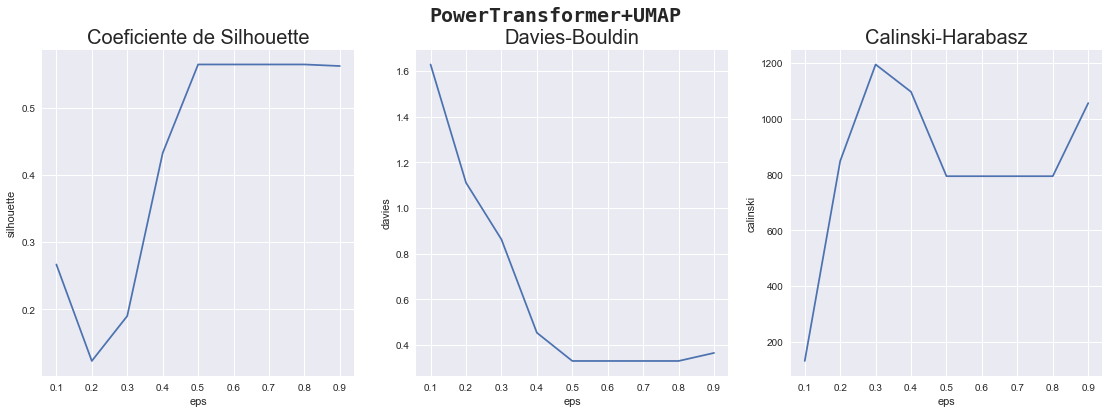

In [20]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_power_UMAP_2_features, 1,10, (19,6),'PowerTransformer+UMAP','DBSCAN','PowerTransformer','UMAP')


## <a class="anchor" id="semr">2. Sem Redução</a>
[Retorna ao Indice](#etapas)

## MinMaxScaler

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,MinMaxScaler,SemRedução,17,0.1,83,-0.336557,1.498731,5.763934
1,DBSCAN,MinMaxScaler,SemRedução,17,0.2,25,-0.235623,1.558951,7.624947
2,DBSCAN,MinMaxScaler,SemRedução,17,0.3,12,0.045845,1.773111,11.559157
3,DBSCAN,MinMaxScaler,SemRedução,17,0.4,3,0.335737,2.705043,21.124634
4,DBSCAN,MinMaxScaler,SemRedução,17,0.5,2,0.496117,2.770938,29.389688
5,DBSCAN,MinMaxScaler,SemRedução,17,0.6,2,0.550899,2.045022,30.852664
6,DBSCAN,MinMaxScaler,SemRedução,17,0.7,4,0.568025,1.517332,16.265266
7,DBSCAN,MinMaxScaler,SemRedução,17,0.8,3,0.584349,1.675485,16.130025
8,DBSCAN,MinMaxScaler,SemRedução,17,0.9,2,0.586685,1.978326,11.489975


Wall time: 2.53 s


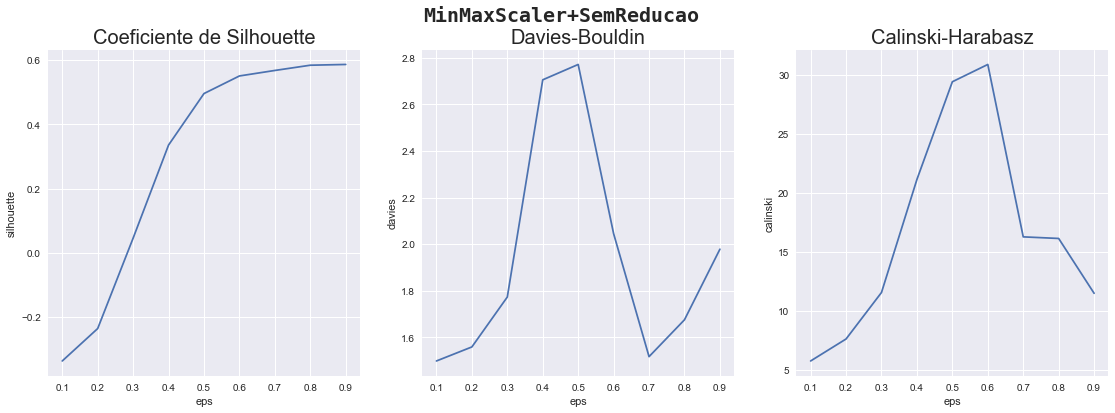

In [21]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_minmax_SemReducao_17_features, 1,10, (19,6),'MinMaxScaler+SemReducao','DBSCAN','MinMaxScaler','SemRedução')


## RobustScaler

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,RobustScaler,SemRedução,17,0.5,2,-0.452571,2.125828,0.153918
1,DBSCAN,RobustScaler,SemRedução,17,0.6,8,-0.477766,1.897320,0.210955
2,DBSCAN,RobustScaler,SemRedução,17,0.7,18,-0.493663,1.941789,0.217107
3,DBSCAN,RobustScaler,SemRedução,17,0.8,25,-0.498712,1.966660,0.252030
4,DBSCAN,RobustScaler,SemRedução,17,0.9,42,-0.481914,2.032088,0.270695
5,DBSCAN,RobustScaler,SemRedução,17,1.0,43,-0.471047,2.056985,0.394655
6,DBSCAN,RobustScaler,SemRedução,17,1.1,43,-0.469036,2.006136,0.536529
7,DBSCAN,RobustScaler,SemRedução,17,1.2,48,-0.447592,1.959377,0.739641
8,DBSCAN,RobustScaler,SemRedução,17,1.3,37,-0.436750,1.946906,1.148614
9,DBSCAN,RobustScaler,SemRedução,17,1.4,46,-0.428212,1.960723,1.154865


Wall time: 6.3 s


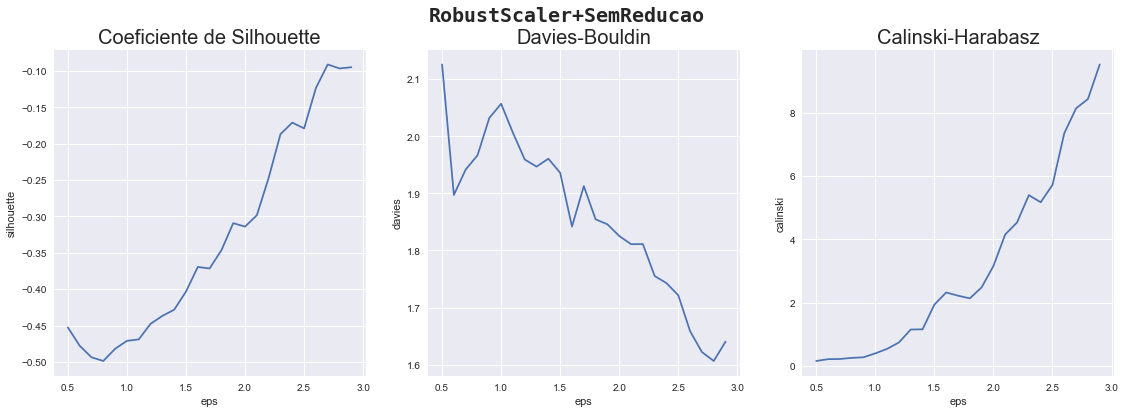

In [22]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_robust_SemReducao_17_features, 5,30, (19,6),'RobustScaler+SemReducao','DBSCAN','RobustScaler','SemRedução')


## PowerTransformer

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
0,DBSCAN,PowerTransformer,SemRedução,17,3.0,22,0.031861,1.754816,21.815040
1,DBSCAN,PowerTransformer,SemRedução,17,3.1,15,0.056372,1.843826,16.913491
2,DBSCAN,PowerTransformer,SemRedução,17,3.2,15,0.057545,1.849470,17.582936
3,DBSCAN,PowerTransformer,SemRedução,17,3.3,12,0.116779,1.939695,22.171815
4,DBSCAN,PowerTransformer,SemRedução,17,3.4,11,0.176297,1.990852,24.952384
5,DBSCAN,PowerTransformer,SemRedução,17,3.5,11,0.167487,2.072096,25.387980
6,DBSCAN,PowerTransformer,SemRedução,17,3.6,7,0.192573,2.447706,41.102042
7,DBSCAN,PowerTransformer,SemRedução,17,3.7,6,0.202526,2.608837,48.593141
8,DBSCAN,PowerTransformer,SemRedução,17,3.8,5,0.244287,2.747977,60.656295
9,DBSCAN,PowerTransformer,SemRedução,17,3.9,5,0.245014,2.793123,61.473568


Wall time: 7.64 s


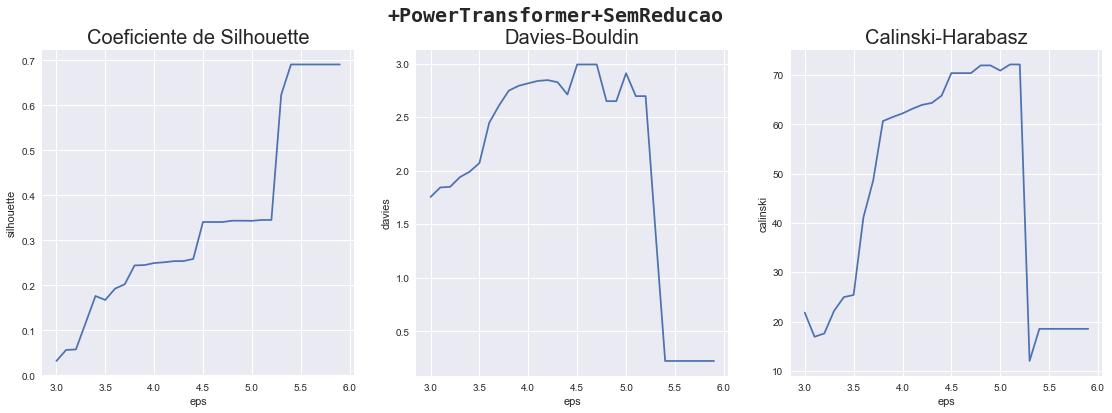

In [23]:
%%time
df_score,df_score_local=mf.plot_inertia_sillhoutte_dbscan(df_score,df_power_SemReducao_17_features, 30,60, (19,6),'+PowerTransformer+SemReducao','DBSCAN','PowerTransformer','SemRedução')


## <a class="anchor" id="analise">3. Análise do dataframe df_score</a>
[Retorna ao Indice](#etapas)

In [24]:
df_score[df_score['silhouette']>0.40].sort_values(by='silhouette', ascending=True)

,Algor.,Transf.,Red.Dim.,Features,eps,clusters,silhouette,davies,calinski
3,DBSCAN,PowerTransformer,UMAP,2,0.4,6,0.432606,0.454361,1097.023785
3,DBSCAN,MinMaxScaler,PCA,9,0.4,3,0.463064,1.676943,36.022674
4,DBSCAN,MinMaxScaler,PCA,9,0.5,2,0.487598,1.852469,21.575523
4,DBSCAN,MinMaxScaler,SemRedução,17,0.5,2,0.496117,2.770938,29.389688
5,DBSCAN,MinMaxScaler,PCA,9,0.6,2,0.540817,0.987099,21.240516
5,DBSCAN,MinMaxScaler,SemRedução,17,0.6,2,0.550899,2.045022,30.852664
8,DBSCAN,PowerTransformer,UMAP,2,0.9,4,0.562149,0.365936,1056.659171
7,DBSCAN,PowerTransformer,UMAP,2,0.8,5,0.564463,0.330763,794.557145
6,DBSCAN,PowerTransformer,UMAP,2,0.7,5,0.564463,0.330763,794.557145
4,DBSCAN,PowerTransformer,UMAP,2,0.5,5,0.564463,0.330763,794.557145


In [25]:
#Escolhido p/ K_MEANS:UMAP c/ PowerTransformer com 8 clusters 
#inertia=1322.840631   
#silhoutte=0.534755     
#davies=0.543320        
#calinski=4540.193466   

#Apresentou 
#Escolhido p/ DBSCAN: UMAP c/ PowerTransformer
#silhoutte=0.562149
#davies=0.365936
#calinski=1056.65917
#eps=0.9

#Selecionado após testes: UMAP c/ PowerTransformer
#silhoutte=0.432606
#davies=0.454361
#calinski=1097.023785
#eps=0.4
#clusters=6
                       

In [26]:

dbs_1 = DBSCAN(eps = 0.9, min_samples=2, n_jobs=-1).fit(df_power_UMAP_2_features)
labels=dbs_1.labels_

In [27]:
df_clusters = pd.DataFrame(labels)
df_temp= df_power_UMAP_2_features.merge(df_clusters, left_index=True, right_index=True)
df_temp.rename({0: 'cluster'}, axis=1, inplace=True)
round(df_temp['cluster'].value_counts(normalize=True)*100,2)

0    81.42
1    10.92
3     3.92
2     3.74
Name: cluster, dtype: float64

In [28]:

dbs_1 = DBSCAN(eps = 0.9, min_samples=2, n_jobs=-1).fit(df_minmax_SemReducao_17_features)
labels=dbs_1.labels_

In [29]:
df_clusters = pd.DataFrame(labels)
df_temp= df_minmax_SemReducao_17_features.merge(df_clusters, left_index=True, right_index=True)
df_temp.rename({0: 'cluster'}, axis=1, inplace=True)
round(df_temp['cluster'].value_counts(normalize=True)*100,2)

 0    99.76
-1     0.24
Name: cluster, dtype: float64

In [30]:
dbs_1 = DBSCAN(eps = 0.9, min_samples=2, n_jobs=-1).fit(df_power_UMAP_2_features)
labels=dbs_1.labels_

In [31]:
df_clusters = pd.DataFrame(labels)
df_temp= df_power_UMAP_2_features.merge(df_clusters, left_index=True, right_index=True)
df_temp.rename({0: 'cluster'}, axis=1, inplace=True)
round(df_temp['cluster'].value_counts(normalize=True)*100,2)

0    81.42
1    10.92
3     3.92
2     3.74
Name: cluster, dtype: float64

In [32]:
dbs_1 = DBSCAN(eps = 0.4, min_samples=2, n_jobs=-1).fit(df_power_UMAP_2_features)
labels=dbs_1.labels_

In [33]:
df_clusters = pd.DataFrame(labels)
df_temp= df_power_UMAP_2_features.merge(df_clusters, left_index=True, right_index=True)
df_temp.rename({0: 'cluster'}, axis=1, inplace=True)
round(df_temp['cluster'].value_counts(normalize=True)*100,2)

0    66.71
1    14.72
2    10.92
3     3.74
5     2.05
4     1.87
Name: cluster, dtype: float64

In [34]:
#Atach clusters ao dataset
df_clusters = pd.DataFrame(labels)
df_abt= df_abt.merge(df_clusters, left_index=True, right_index=True)
df_abt.rename({0: 'cluster'}, axis=1, inplace=True)

In [35]:
df_abt_sc= df_abt_sc.merge(df_clusters, left_index=True, right_index=True)
df_abt_sc.rename({0: 'cluster'}, axis=1, inplace=True)


In [36]:
round(df_temp['cluster'].value_counts(normalize=True)*100,2)

0    66.71
1    14.72
2    10.92
3     3.74
5     2.05
4     1.87
Name: cluster, dtype: float64

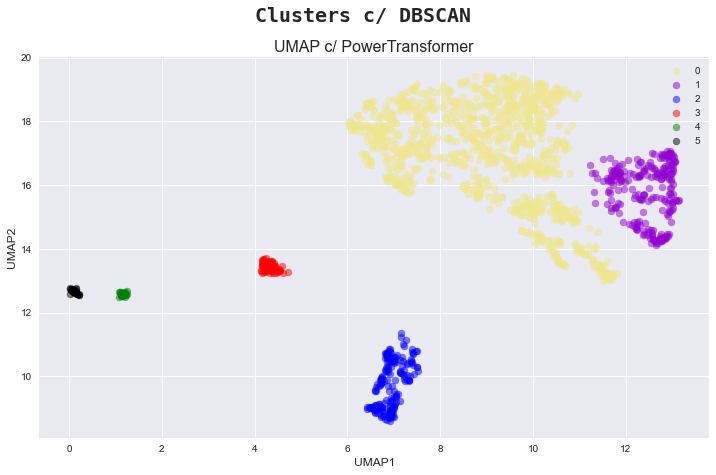

In [37]:

plt.style.use('seaborn')
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('UMAP1', fontsize=12)
ax.set_ylabel('UMAP2', fontsize=12)
ax.set_title('UMAP c/ PowerTransformer', fontsize= 16)
 
targets = [0, 1, 2, 3, 4, 5]
colors = ['khaki', 'darkviolet','blue','red','green','black']
for target, color in zip(targets, colors):
    indicesToKeep = df_temp['cluster'] == target
    ax.scatter(df_temp.loc[indicesToKeep, 'TUMAP1'],
               df_temp.loc[indicesToKeep, 'TUMAP2'], c=color, s=50, alpha=0.5)

plt.suptitle('Clusters c/ DBSCAN', fontsize = 20, fontname = 'monospace', weight = 'bold')    
ax.legend(targets)
#ax.grid()

In [38]:
df_score.to_excel(caminho_temp+'03_02_Modelos_DBSCAN_df_score.xlsx', index=True)

In [39]:
df_abt.to_excel(caminho_temp+'03_02_Modelos_DBSCAN_df_abt_dbscan_cluster.xlsx', index=True)

In [40]:
df_abt_sc.to_excel(caminho_temp+'03_02_Modelos_DBSCAN_df_abt_sc_dbscan.xlsx', index=True)


In [41]:
"""
Modelo DBScan
Esse modelo e muito similar ao K-meas pois e um modelo nao-supervisionado, onde devemos setar alguns parametros e ele ira 
determinar as melhores disposicoes dos dados.
No caso desse algoritmo os dados necessarios para os parametros sao o eps/ epsilon, min_samples e metric
Esses parametros sao classificados da seguinte forma:

eps: Valor correspondente a distancia entre dois pontos, se a distancia entre eles estiver abaixo do limite epsilon
min_samples: numero minimo de vizinhos que um determinado ponto deve ter
metric: metrica utilizada, por padrao se utiliza a metrica euclidiana
Para descobrir o valor de eps que utilizaremos, no algoritmo do vizinho mais proximo devermos captar o valor correspondente
ao ponto de maxima curvatura.


Esse modelo e muito similar ao K-meas pois e um modelo nao-supervisionado, onde devemos setar alguns parametros e ele ira 
determinar as melhores disposicoes dos dados.
No caso desse algoritmo os dados necessarios para os parametros sao o eps/ epsilon, min_samples e metric
Esses parametros sao classificados da seguinte forma:

eps: Valor correspondente a distancia entre dois pontos, se a distancia entre eles estiver abaixo do limite epsilon
min_samples: numero minimo de vizinhos que um determinado ponto deve ter
metric: metrica utilizada, por padrao se utiliza a metrica euclidiana
Para descobrir o valor de eps que utilizaremos, no algoritmo do vizinho mais proximo devermos captar o valor correspondente
ao ponto de maxima curvatura.

"""

'\nModelo DBScan\nEsse modelo e muito similar ao K-meas pois e um modelo nao-supervisionado, onde devemos setar alguns parametros e ele ira \ndeterminar as melhores disposicoes dos dados.\nNo caso desse algoritmo os dados necessarios para os parametros sao o eps/ epsilon, min_samples e metric\nEsses parametros sao classificados da seguinte forma:\n\neps: Valor correspondente a distancia entre dois pontos, se a distancia entre eles estiver abaixo do limite epsilon\nmin_samples: numero minimo de vizinhos que um determinado ponto deve ter\nmetric: metrica utilizada, por padrao se utiliza a metrica euclidiana\nPara descobrir o valor de eps que utilizaremos, no algoritmo do vizinho mais proximo devermos captar o valor correspondente\nao ponto de maxima curvatura.\n\n\nEsse modelo e muito similar ao K-meas pois e um modelo nao-supervisionado, onde devemos setar alguns parametros e ele ira \ndeterminar as melhores disposicoes dos dados.\nNo caso desse algoritmo os dados necessarios para os pa